# Kolmogorov–Arnold Networks (KAN) Architecture



## 1) Install prerequisites and pin versions

In [ ]:
%pip install -q -U pip setuptools wheel
%pip install -q -U pykan cmake ninja pybind11 tqdm


## 2) Check Torch/Runtime

In [ ]:
import torch, platform
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("cuda version:", torch.version.cuda)
print("python:", platform.python_version())
device = "cuda" if torch.cuda.is_available() else "cpu"


torch: 2.9.0+cu126
cuda available: False
cuda version: 12.6
python: 3.12.12


## 3) Install pykan  

In [ ]:
import torch
from kan import KAN
from kan.utils import create_dataset

model = KAN(width=[2,5,1], grid=5, k=3, seed=0, device=device)

# f(x,y) = exp( sin(pi*x) + y^2 )
f = lambda x: torch.exp(torch.sin(torch.pi * x[:, [0]]) + x[:, [1]]**2)

dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape


checkpoint directory created: ./model
saving model version 0.0


(torch.Size([1000, 2]), torch.Size([1000, 1]))

## 4) Initialize model and dataset

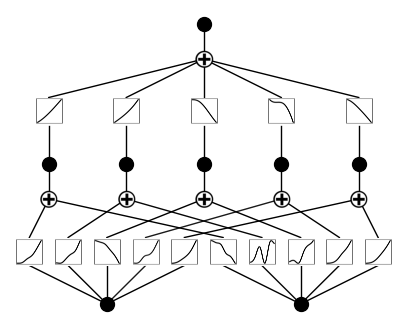

In [ ]:
_ = model(dataset['train_input'])   
model.plot(beta=100)                


## 5) Plot at initialization

| train_loss: 1.79e-01 | test_loss: 1.80e-01 | reg: 1.89e+01 | : 100%|█| 20/20 [00:14<00:00,  1.38it


saving model version 0.1


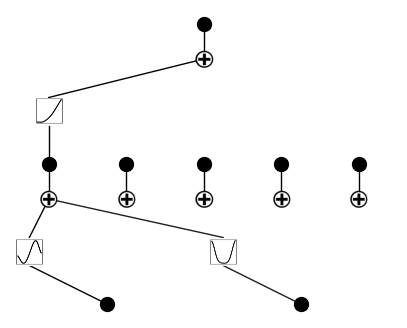

In [ ]:
model.fit(
    dataset,
    opt="LBFGS",
    steps=20,
    lamb=0.01,
    lamb_entropy=10.0
)
model.plot()


## 6) Train

saving model version 0.2


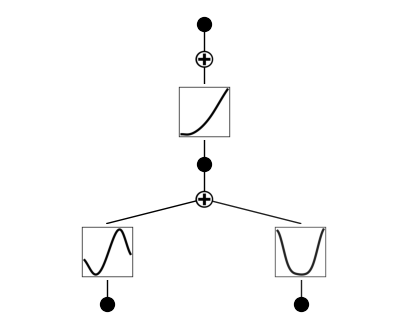

In [ ]:
model = model.prune()
_ = model(dataset['train_input'])
model.plot()


## 7) Prune and re-plot

| train_loss: 7.30e-03 | test_loss: 7.24e-03 | reg: 7.64e+00 | : 100%|█| 50/50 [00:07<00:00,  6.50it


saving model version 0.3


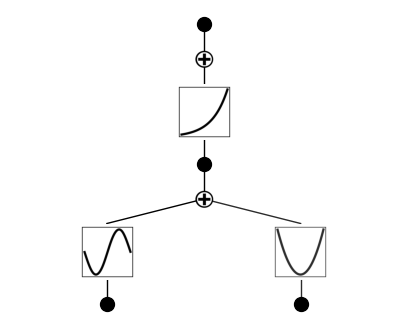

In [ ]:
model.fit(dataset, opt="LBFGS", steps=50)
model.plot()


In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)


fixing (0,0,0) with sin, r2=0.9999731779098511, c=2
fixing (0,1,0) with x^2, r2=0.9999992847442627, c=2
fixing (1,0,0) with exp, r2=0.9999991655349731, c=2
saving model version 0.4
